In [8]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

tf.compat.v1.disable_eager_execution()
def prepare_image(img):
        img = tf.keras.preprocessing.image.load_img(img, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array_expanded_dims = np.expand_dims(img_array, axis=0)
        return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded_dims)


img2array = prepare_image('../static/test2.jpg')
model = tf.keras.models.load_model('../models/MobileNetV2_Flowers.h5')

pred = model.predict(img2array)

ind=np.argmax(pred[0])
vector=model.output[:,ind]
last_conv=model.get_layer("dense")
grads=tf.keras.backend.gradients(vector,last_conv.output)[0]
pooled_grad=tf.keras.backend.mean(grads)
iterate=tf.keras.backend.function([model.input],[pooled_grad,last_conv.output[0]])
pooled_grad_value,conv_layer_value=iterate(img2array)

heatmap=np.mean(pooled_grad_value)

heatmap=np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
heatmap=cv2.resize(heatmap,(img2array.shape[1],img2array.shape[0]))
heatmap=np.uint8(255*heatmap)

heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)

In [16]:
print(pooled_grad_value)

0.2


In [17]:
print(conv_layer_value)

[0.10954357 0.0067625  0.00108073 0.8623354  0.0202778 ]


In [18]:
for i in range(2048):
    conv_layer_value[:,:,:,:,i] *= pooled_grad_value[i]

IndexError: too many indices for array

W0101 03:22:29.286269  4728 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


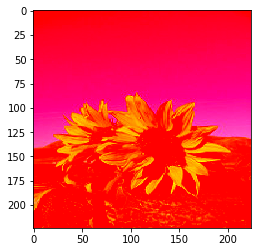

In [11]:
exp_img = img2array.reshape(224,224,3)
z=heatmap*0.4+exp_img
plt.imshow(z)
plt.show()

In [1]:
###### ANOTHER

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

tf.compat.v1.disable_eager_execution()
def prepare_image(img):
        img = tf.keras.preprocessing.image.load_img(img, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array_expanded_dims = np.expand_dims(img_array, axis=0)
        return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded_dims)


img2array = prepare_image('../static/test2.jpg')
model = tf.keras.models.load_model('../models/MobileNetV2_Flowers.h5')

W0101 18:20:06.519593 14296 deprecation.py:506] From C:\Users\merid\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
LAYER_NAME = 'dense'

In [4]:
pred = model.predict(img2array)

In [5]:
grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAYER_NAME).output, model.output])


In [23]:
with tf.GradientTape() as tape:
    img = img2array.reshape(1, 224,224,3)
    conv_outputs, predictions = grad_model(img)[0]
    loss = predictions[:]

OperatorNotAllowedInGraphError: iterating over `tf.Tensor` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.

In [ ]:
output = conv_outputs[0]


In [ ]:
grads = tape.gradient(loss, conv_outputs)[0]